# === Personal Project ===
# eBay IPhone 14 Prices Prediction
This is a project for my Data Science Portofolio, currently ongoing.

Date: 11.27.2023

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import plotly.express as px

In [2]:
# Set up pandas
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

# 1. Load Dataframe
-> iPhone 14 Pro Max Prices

In [3]:
df = pd.read_csv('data/ebay_iphone_14_pro_max.csv')

## 2. Data Preprocessing

In [4]:
# Make title all lowercase

df['Title'] = df['Title'].apply(lambda x: x.lower())

# remove all space
df['Title'] = df['Title'].str.replace('[^\w\s]', '', regex=True)

In [5]:
df

Title  \
0               apple iphone 14 pro max 512gb unlocked att tmobile verizon very good condition   
1              case for iphone 15 pro max 14 plus 13 12 11 xs shockproof full protective cover   
2                        apple iphone 14 pro max a16 128gb 256gb 512gb 1tb unlocked new sealed   
3                                  apple iphone 14 pro max 256gb  unlocked us e sim  excellent   
4                              apple iphone 14 pro max  128gb  deep purple unlocked smartphone   
5                                     new listingapple iphone 14 pro max  128gb black unlocked   
6                                  apple iphone 14 pro max 256gb  unlocked us e sim  very good   
7                    apple iphone 14 pro max space black  for parts only not working lcd issue   
8                            apple iphone 14 pro max 256gb space black unlocked fair condition   
9                  new listingapple iphone 14 pro max 256gb  purple  blocked opened never used   
10            new listingapple iphone 14 pro max  256gb  space black carrier locked  check esn   
11                             tmobile apple iphone 14 pro max 256gb mq8w3lla a2651 no reserve   
12                                     new listingapple iphone 14 pro max  128gb  gold tmobile   
13                           apple iphone 14 pro max 128gb space black unlocked fair condition   
14                         apple iphone 14 pro max  128gb  space black verizon check esn  read   
15                     apple iphone 14 pro max 128gb  space blackus cellular look at lens read   
16              parts and repair apple iphone 14 pro max a2651 128gb silver tmobile check imei   
17                         apple iphone 14 pro max  256gb  space black verizon check esn  read   
18                    new listingapple iphone 14 pro max  128gb  white verizon check esn  read   
19                                       apple iphone 14 pro or pro max parts and repairs only   
20                                             apple iphone 14 pro max  512gb  silver unlocked   
21                  damaged apple iphone 14 pro max 128gb black unlocked  spares  repairs f481   
22                               apple iphone 14 pro max  256gb  for parts deep purple verizon   
23                           new listingapple iphone 14 pro max 128gb deep purple att financed   
24                                             apple iphone 14 pro max  128gb  space black att   
25                    new listingapple iphone 14 pro max  128gb locked to owner for parts only   
26                          apple iphone 14 pro max  128gb  gold verizon a excellent condition   
27             case for iphone 15 14 13 12 11 xr 7 8 clear shockproof silicone 360 phone cover   
28                             new listingapple iphone 14 pro max  128gb  space black unlocked   
29             case for iphone 14 13 12 11 xr 7 8 se 2 3 clear shockproof back 360 phone cover   
30                360 full body case for iphone 14 13 12 11 pro max mini xr xs max 7 8 plus se   
31                                         apple iphone 14 pro max  128gb  deep purple tmobile   
32                                       new listingapple iphone 14 pro max a2651 256gb purple   
33                     apple iphone 14 pro max  512gb  gold  unlocked  please read description   
34             verizon apple iphone 14 pro max a2651 silver broken parts only read description   
35          new listingbrand new apple iphone 14 pro max space black 1tb applecare replacement   
36                                      new apple iphone 14 pro max  1tb  space black unlocked   
37              apple iphone 14 pro max 256gb unlocked att tmobile verizon very good condition   
38                               apple iphone 14 pro max  512gb  space black unlockedfor parts   
39                    apple iphone 14 pro max deep purple 5g smartphone 128gb vodafone network   
40           new listingapple iphone 14 pro max 512gb deep purple unloc

## 2 Data Cleaning & Feature Engineering

### 2 Feature Engineering

what affects the prices of the iPhone?
Based on the Title Column of df.
1. Condition:
    Damaged = 3, 
    Good = 2, 
    Very Good / Excellent = 1, 
    Brand New = 0
    
2. Storage: 1TB = 0, 512GB = 1, 256GB = 2, 128GB = 3
3. IMEI: if has check imei, prices may be less (needs to be compared)
4. ESN: if has check ESN or bad ESN, prices may be less
3. Color (?)
4. Unlocked -> A factory unlock for your iPhone lets you swap out your current service carrier for a new carrier or several.
    Unlocked tends to be more expensive.
    1 unlock, 0 lock
    
Goals: Make new Column based on the categories that affected the prices.

In [6]:
# Source: Apple

iphone_colors = ["gold", "silver", "deep purple", "space black", "black", "purple"]
# space black and deep purple simplified to deep purple and space black

In [7]:
# extract storage capacity function
def extract_storage_capacity(title):
    # match = re.search(r'\b(\d+GB)\b', title, re.IGNORECASE)
    match = re.search(r'\b(\d+\s?(gb|tb))\b', title, re.IGNORECASE)
    return match.group(1).replace('gb', '').replace('tb', '000').replace(' tb','000') if match else None

# extract color function
def extract_color(title):
    for color in iphone_colors:
        if color in title.lower():
            return color.capitalize()
    return None

# Helper function to extract condition
def extract_condition(title):
    conditions = ["new", "used", "refurbished", 'very good', 'excellent', 'fair', 'damaged', 'cracked', 'broken']
    for condition in conditions:
        if condition in title.lower():
            return condition.capitalize()
    return "Unknown"

# Extracting new features
df['Storage Capacity'] = df['Title'].apply(extract_storage_capacity)
df['Color'] = df['Title'].apply(extract_color)
df['Condition'] = df['Title'].apply(extract_condition)

# Displaying the updated dataframe
df.head()

Title  \
0   apple iphone 14 pro max 512gb unlocked att tmobile verizon very good condition   
1  case for iphone 15 pro max 14 plus 13 12 11 xs shockproof full protective cover   
2            apple iphone 14 pro max a16 128gb 256gb 512gb 1tb unlocked new sealed   
3                      apple iphone 14 pro max 256gb  unlocked us e sim  excellent   
4                  apple iphone 14 pro max  128gb  deep purple unlocked smartphone   

                    Price Storage Capacity        Color  Condition  
0                 $884.95              512         None  Very good  
1          $2.48 to $6.22             None         None    Unknown  
2  $1,429.49 to $2,089.49              128         None        New  
3                 $909.99              256         None  Excellent  
4                 $810.00              128  Deep purple    Unknown

### Colour Column

In [8]:
# df = df.drop(df.loc[~df['Color'].isin()])

# map colors as a digit

color_mapping = {
    None: 0, "gold": 1, "silver": 2, "purple": 3, "deep purple": 3, "black": 4, "space black": 4
}

df['color_number'] = df['Color'].str.lower().map(color_mapping)

In [9]:
df

Title  \
0               apple iphone 14 pro max 512gb unlocked att tmobile verizon very good condition   
1              case for iphone 15 pro max 14 plus 13 12 11 xs shockproof full protective cover   
2                        apple iphone 14 pro max a16 128gb 256gb 512gb 1tb unlocked new sealed   
3                                  apple iphone 14 pro max 256gb  unlocked us e sim  excellent   
4                              apple iphone 14 pro max  128gb  deep purple unlocked smartphone   
5                                     new listingapple iphone 14 pro max  128gb black unlocked   
6                                  apple iphone 14 pro max 256gb  unlocked us e sim  very good   
7                    apple iphone 14 pro max space black  for parts only not working lcd issue   
8                            apple iphone 14 pro max 256gb space black unlocked fair condition   
9                  new listingapple iphone 14 pro max 256gb  purple  blocked opened never used   
10            new listingapple iphone 14 pro max  256gb  space black carrier locked  check esn   
11                             tmobile apple iphone 14 pro max 256gb mq8w3lla a2651 no reserve   
12                                     new listingapple iphone 14 pro max  128gb  gold tmobile   
13                           apple iphone 14 pro max 128gb space black unlocked fair condition   
14                         apple iphone 14 pro max  128gb  space black verizon check esn  read   
15                     apple iphone 14 pro max 128gb  space blackus cellular look at lens read   
16              parts and repair apple iphone 14 pro max a2651 128gb silver tmobile check imei   
17                         apple iphone 14 pro max  256gb  space black verizon check esn  read   
18                    new listingapple iphone 14 pro max  128gb  white verizon check esn  read   
19                                       apple iphone 14 pro or pro max parts and repairs only   
20                                             apple iphone 14 pro max  512gb  silver unlocked   
21                  damaged apple iphone 14 pro max 128gb black unlocked  spares  repairs f481   
22                               apple iphone 14 pro max  256gb  for parts deep purple verizon   
23                           new listingapple iphone 14 pro max 128gb deep purple att financed   
24                                             apple iphone 14 pro max  128gb  space black att   
25                    new listingapple iphone 14 pro max  128gb locked to owner for parts only   
26                          apple iphone 14 pro max  128gb  gold verizon a excellent condition   
27             case for iphone 15 14 13 12 11 xr 7 8 clear shockproof silicone 360 phone cover   
28                             new listingapple iphone 14 pro max  128gb  space black unlocked   
29             case for iphone 14 13 12 11 xr 7 8 se 2 3 clear shockproof back 360 phone cover   
30                360 full body case for iphone 14 13 12 11 pro max mini xr xs max 7 8 plus se   
31                                         apple iphone 14 pro max  128gb  deep purple tmobile   
32                                       new listingapple iphone 14 pro max a2651 256gb purple   
33                     apple iphone 14 pro max  512gb  gold  unlocked  please read description   
34             verizon apple iphone 14 pro max a2651 silver broken parts only read description   
35          new listingbrand new apple iphone 14 pro max space black 1tb applecare replacement   
36                                      new apple iphone 14 pro max  1tb  space black unlocked   
37              apple iphone 14 pro max 256gb unlocked att tmobile verizon very good condition   
38                               apple iphone 14 pro max  512gb  space black unlockedfor parts   
39                    apple iphone 14 pro max deep purple 5g smartphone 128gb vodafone network   
40           new listingapple iphone 14 pro max 512gb deep purple unloc

### Condition Columns

In [10]:
# Grab all unique values in condition
values = df['Condition'].unique()
values

array(['Very good', 'Unknown', 'New', 'Excellent', 'Fair', 'Damaged',
       'Broken', 'Cracked', 'Used', 'Refurbished'], dtype=object)

In [11]:
# Categorize each condition to generalize it. Here I selected 4 conditions

condition_numeric_mapping = {
    'Very good': 3, 'Excellent': 3, 'New': 3,  # Good condition
    'Fair': 2, 'Used': 2, 'Refurbished': 2,    # Ok condition
    'Damaged': 1, 'Cracked': 1, 'Broken': 1,   # Bad condition
    'Unknown': 0                               # Unknown condition
}

# Applying the numeric mapping to the 'Condition' column
df['Condition_number'] = df['Condition'].map(condition_numeric_mapping)

In [12]:
df.head()

Title  \
0   apple iphone 14 pro max 512gb unlocked att tmobile verizon very good condition   
1  case for iphone 15 pro max 14 plus 13 12 11 xs shockproof full protective cover   
2            apple iphone 14 pro max a16 128gb 256gb 512gb 1tb unlocked new sealed   
3                      apple iphone 14 pro max 256gb  unlocked us e sim  excellent   
4                  apple iphone 14 pro max  128gb  deep purple unlocked smartphone   

                    Price Storage Capacity        Color  Condition  \
0                 $884.95              512         None  Very good   
1          $2.48 to $6.22             None         None    Unknown   
2  $1,429.49 to $2,089.49              128         None        New   
3                 $909.99              256         None  Excellent   
4                 $810.00              128  Deep purple    Unknown   

   color_number  Condition_number  
0             0                 3  
1             0                 0  
2             0                 3  
3             0                 3  
4             3                 0

In [13]:
df

Title  \
0               apple iphone 14 pro max 512gb unlocked att tmobile verizon very good condition   
1              case for iphone 15 pro max 14 plus 13 12 11 xs shockproof full protective cover   
2                        apple iphone 14 pro max a16 128gb 256gb 512gb 1tb unlocked new sealed   
3                                  apple iphone 14 pro max 256gb  unlocked us e sim  excellent   
4                              apple iphone 14 pro max  128gb  deep purple unlocked smartphone   
5                                     new listingapple iphone 14 pro max  128gb black unlocked   
6                                  apple iphone 14 pro max 256gb  unlocked us e sim  very good   
7                    apple iphone 14 pro max space black  for parts only not working lcd issue   
8                            apple iphone 14 pro max 256gb space black unlocked fair condition   
9                  new listingapple iphone 14 pro max 256gb  purple  blocked opened never used   
10            new listingapple iphone 14 pro max  256gb  space black carrier locked  check esn   
11                             tmobile apple iphone 14 pro max 256gb mq8w3lla a2651 no reserve   
12                                     new listingapple iphone 14 pro max  128gb  gold tmobile   
13                           apple iphone 14 pro max 128gb space black unlocked fair condition   
14                         apple iphone 14 pro max  128gb  space black verizon check esn  read   
15                     apple iphone 14 pro max 128gb  space blackus cellular look at lens read   
16              parts and repair apple iphone 14 pro max a2651 128gb silver tmobile check imei   
17                         apple iphone 14 pro max  256gb  space black verizon check esn  read   
18                    new listingapple iphone 14 pro max  128gb  white verizon check esn  read   
19                                       apple iphone 14 pro or pro max parts and repairs only   
20                                             apple iphone 14 pro max  512gb  silver unlocked   
21                  damaged apple iphone 14 pro max 128gb black unlocked  spares  repairs f481   
22                               apple iphone 14 pro max  256gb  for parts deep purple verizon   
23                           new listingapple iphone 14 pro max 128gb deep purple att financed   
24                                             apple iphone 14 pro max  128gb  space black att   
25                    new listingapple iphone 14 pro max  128gb locked to owner for parts only   
26                          apple iphone 14 pro max  128gb  gold verizon a excellent condition   
27             case for iphone 15 14 13 12 11 xr 7 8 clear shockproof silicone 360 phone cover   
28                             new listingapple iphone 14 pro max  128gb  space black unlocked   
29             case for iphone 14 13 12 11 xr 7 8 se 2 3 clear shockproof back 360 phone cover   
30                360 full body case for iphone 14 13 12 11 pro max mini xr xs max 7 8 plus se   
31                                         apple iphone 14 pro max  128gb  deep purple tmobile   
32                                       new listingapple iphone 14 pro max a2651 256gb purple   
33                     apple iphone 14 pro max  512gb  gold  unlocked  please read description   
34             verizon apple iphone 14 pro max a2651 silver broken parts only read description   
35          new listingbrand new apple iphone 14 pro max space black 1tb applecare replacement   
36                                      new apple iphone 14 pro max  1tb  space black unlocked   
37              apple iphone 14 pro max 256gb unlocked att tmobile verizon very good condition   
38                               apple iphone 14 pro max  512gb  space black unlockedfor parts   
39                    apple iphone 14 pro max deep purple 5g smartphone 128gb vodafone network   
40           new listingapple iphone 14 pro max 512gb deep purple unloc

### Network Carrier

In [14]:
# Analyze unique samples of title

unique_titles_sample = df['Title'].dropna().unique()[:50]  # Analyzing first 50 unique titles

unique_titles_sample

array(['apple iphone 14 pro max 512gb unlocked att tmobile verizon very good condition',
       'case for iphone 15 pro max 14 plus 13 12 11 xs shockproof full protective cover',
       'apple iphone 14 pro max a16 128gb 256gb 512gb 1tb unlocked new sealed',
       'apple iphone 14 pro max 256gb  unlocked us e sim  excellent',
       'apple iphone 14 pro max  128gb  deep purple unlocked smartphone',
       'new listingapple iphone 14 pro max  128gb black unlocked',
       'apple iphone 14 pro max 256gb  unlocked us e sim  very good',
       'apple iphone 14 pro max space black  for parts only not working lcd issue',
       'apple iphone 14 pro max 256gb space black unlocked fair condition',
       'new listingapple iphone 14 pro max 256gb  purple  blocked opened never used',
       'new listingapple iphone 14 pro max  256gb  space black carrier locked  check esn',
       'tmobile apple iphone 14 pro max 256gb mq8w3lla a2651 no reserve',
       'new listingapple iphone 14 pro max  128gb

In [15]:
# func to extract network carrier

def extract_network_carrier_enhanced(title):
    # Expanded list of carriers with common variations
    carriers = [
        "unlocked", "att", "tmobile", "verizon", "sprint", "us cellular", 
        "cricket", "metro", "boost mobile", "virgin mobile", "straight talk", 
        "tracfone", "google fi", "xfinity mobile", "vodafone", "o2", "ee", "three"
    ]
    for carrier in carriers:
        if re.search(r'\b' + re.escape(carrier) + r'\b', title, re.IGNORECASE):
            return carrier
    return "other/unknown"  # Default category for titles where no carrier is detected

df['Network Carrier'] = df['Title'].apply(extract_network_carrier_enhanced)

In [16]:
df

Title  \
0               apple iphone 14 pro max 512gb unlocked att tmobile verizon very good condition   
1              case for iphone 15 pro max 14 plus 13 12 11 xs shockproof full protective cover   
2                        apple iphone 14 pro max a16 128gb 256gb 512gb 1tb unlocked new sealed   
3                                  apple iphone 14 pro max 256gb  unlocked us e sim  excellent   
4                              apple iphone 14 pro max  128gb  deep purple unlocked smartphone   
5                                     new listingapple iphone 14 pro max  128gb black unlocked   
6                                  apple iphone 14 pro max 256gb  unlocked us e sim  very good   
7                    apple iphone 14 pro max space black  for parts only not working lcd issue   
8                            apple iphone 14 pro max 256gb space black unlocked fair condition   
9                  new listingapple iphone 14 pro max 256gb  purple  blocked opened never used   
10            new listingapple iphone 14 pro max  256gb  space black carrier locked  check esn   
11                             tmobile apple iphone 14 pro max 256gb mq8w3lla a2651 no reserve   
12                                     new listingapple iphone 14 pro max  128gb  gold tmobile   
13                           apple iphone 14 pro max 128gb space black unlocked fair condition   
14                         apple iphone 14 pro max  128gb  space black verizon check esn  read   
15                     apple iphone 14 pro max 128gb  space blackus cellular look at lens read   
16              parts and repair apple iphone 14 pro max a2651 128gb silver tmobile check imei   
17                         apple iphone 14 pro max  256gb  space black verizon check esn  read   
18                    new listingapple iphone 14 pro max  128gb  white verizon check esn  read   
19                                       apple iphone 14 pro or pro max parts and repairs only   
20                                             apple iphone 14 pro max  512gb  silver unlocked   
21                  damaged apple iphone 14 pro max 128gb black unlocked  spares  repairs f481   
22                               apple iphone 14 pro max  256gb  for parts deep purple verizon   
23                           new listingapple iphone 14 pro max 128gb deep purple att financed   
24                                             apple iphone 14 pro max  128gb  space black att   
25                    new listingapple iphone 14 pro max  128gb locked to owner for parts only   
26                          apple iphone 14 pro max  128gb  gold verizon a excellent condition   
27             case for iphone 15 14 13 12 11 xr 7 8 clear shockproof silicone 360 phone cover   
28                             new listingapple iphone 14 pro max  128gb  space black unlocked   
29             case for iphone 14 13 12 11 xr 7 8 se 2 3 clear shockproof back 360 phone cover   
30                360 full body case for iphone 14 13 12 11 pro max mini xr xs max 7 8 plus se   
31                                         apple iphone 14 pro max  128gb  deep purple tmobile   
32                                       new listingapple iphone 14 pro max a2651 256gb purple   
33                     apple iphone 14 pro max  512gb  gold  unlocked  please read description   
34             verizon apple iphone 14 pro max a2651 silver broken parts only read description   
35          new listingbrand new apple iphone 14 pro max space black 1tb applecare replacement   
36                                      new apple iphone 14 pro max  1tb  space black unlocked   
37              apple iphone 14 pro max 256gb unlocked att tmobile verizon very good condition   
38                               apple iphone 14 pro max  512gb  space black unlockedfor parts   
39                    apple iphone 14 pro max deep purple 5g smartphone 128gb vodafone network   
40           new listingapple iphone 14 pro max 512gb deep purple unloc

In [17]:
df['Network Carrier'].value_counts()

Network Carrier
unlocked          488
other/unknown     253
att               111
verizon            86
tmobile            66
us cellular         5
cricket             3
straight talk       3
vodafone            2
xfinity mobile      2
sprint              2
o2                  1
ee                  1
Name: count, dtype: int64

In [18]:
df.loc[df['Network Carrier'] == 'other/unknown']

Title  \
1            case for iphone 15 pro max 14 plus 13 12 11 xs shockproof full protective cover   
7                  apple iphone 14 pro max space black  for parts only not working lcd issue   
9                new listingapple iphone 14 pro max 256gb  purple  blocked opened never used   
10          new listingapple iphone 14 pro max  256gb  space black carrier locked  check esn   
15                   apple iphone 14 pro max 128gb  space blackus cellular look at lens read   
19                                     apple iphone 14 pro or pro max parts and repairs only   
25                  new listingapple iphone 14 pro max  128gb locked to owner for parts only   
27           case for iphone 15 14 13 12 11 xr 7 8 clear shockproof silicone 360 phone cover   
29           case for iphone 14 13 12 11 xr 7 8 se 2 3 clear shockproof back 360 phone cover   
30              360 full body case for iphone 14 13 12 11 pro max mini xr xs max 7 8 plus se   
32                                     new listingapple iphone 14 pro max a2651 256gb purple   
35        new listingbrand new apple iphone 14 pro max space black 1tb applecare replacement   
38                             apple iphone 14 pro max  512gb  space black unlockedfor parts   
42                             apple iphone 14 pro max  128gb locked to owner for parts only   
46               case for iphone 14 12 13 pro max 11 7 8 360 clear shockproof silicone cover   
51                  apple iphone 15 pro max 1tb falcon 150grams 18k gold with diamonds video   
55                                           apple iphone 14 pro max  128gb  silver spectrum   
56            case for iphone 15 14 13 12 11 xr 7 8 se 2 3 clear shockproof full phone cover   
57             shockproof case for iphone 14 13 12 11 xr 7 8 se 2 clear full phone cover 360   
58           case for iphone 14 13 12 11 xr 7 8 se clear shockproof silicone 360 phone cover   
60                     new apple iphone 14 pro max 5g  attverizontmobile  128gb256gb512gb1tb   
71            case for iphone 14 11 13 pro max 12 xr 8 se clear jelly shockproof phone cover   
72                   mint apple iphone 14 pro max 128gb spectrum mobile network  black  more   
73            full body case for iphone 14 12 13 pro max 11 7 8 se 2 3 360 front  back cover   
74           360 full body case for iphone 15 14 13 12 11 pro max mini xr xs max 7 8 plus se   
76           apple iphone 13 pro gold ic locked very good condition and iphone 11 128gb read   
80           case for iphone 14 13 12 11 xr 7 8 se clear shockproof silicone 360 phone cover   
81                                              new listingiphone 14 pro max 1tb deep purple   
83              new listingapple iphone 14 pro max 128 gb  space black  immaculate condition   
86                 3x privacy screen protector tempered glass for iphone 14 13 12 11 pro max   
88           case for iphone 14 13 12 11 xr 7 8 clear shockproof phone full protection cover   
89                   360 full body case for iphone 14 12 13 pro max 11 7 8 front  back cover   
90                360 full body case for iphone 15 14 13 12 11 xr 7 8 plus se 2 3 shockproof   
92                   apple iphone 14 pro max 256gb space black us reseller flex  new  sealed   
93           new listingapple iphone 14 pro max  128gb  silver attlocked excellent condition   
94                      apple iphone 14 pro max  512gb  deep purple locked dont know the pin   
99       new listingtwo iphone 14 pro max 256gb deep purple and gold never open with receipt   
102                     case for iphone 14 12 13 pro max 11 7 8 se 2 3 360 front  back cover   
103               case for iphone 14 13 12 11 xr 7 8 se 2 3 clear shockproof 360 phone cover   
107                                                             new listingiphone 14 pro max   
111                apple iphone 14 pro max  with physical sim slot  every color and capacity   
123                                       apple iphone 

In [19]:
# Categorize the network carrier, such that:
# 0: Unlocked, 1: Locked to a specific carrier/Locked, 2: Other/Unknown

def categorize_carriers(carrier):
    if carrier == "unlocked":
        return 0  # Unlocked
    elif carrier == "other/unknown":
        return 2  # Other/Unknown
    else:
        return 1  # Locked to a specific carrier

# Applying the categorization function to the 'Network Carrier' column
df['Carrier Category'] = df['Network Carrier'].apply(categorize_carriers)

# Displaying the updated dataframe
df[['Title', 'Network Carrier', 'Carrier Category']].head()

Title  \
0   apple iphone 14 pro max 512gb unlocked att tmobile verizon very good condition   
1  case for iphone 15 pro max 14 plus 13 12 11 xs shockproof full protective cover   
2            apple iphone 14 pro max a16 128gb 256gb 512gb 1tb unlocked new sealed   
3                      apple iphone 14 pro max 256gb  unlocked us e sim  excellent   
4                  apple iphone 14 pro max  128gb  deep purple unlocked smartphone   

  Network Carrier  Carrier Category  
0        unlocked                 0  
1   other/unknown                 2  
2        unlocked                 0  
3        unlocked                 0  
4        unlocked                 0

In [20]:
df

Title  \
0               apple iphone 14 pro max 512gb unlocked att tmobile verizon very good condition   
1              case for iphone 15 pro max 14 plus 13 12 11 xs shockproof full protective cover   
2                        apple iphone 14 pro max a16 128gb 256gb 512gb 1tb unlocked new sealed   
3                                  apple iphone 14 pro max 256gb  unlocked us e sim  excellent   
4                              apple iphone 14 pro max  128gb  deep purple unlocked smartphone   
5                                     new listingapple iphone 14 pro max  128gb black unlocked   
6                                  apple iphone 14 pro max 256gb  unlocked us e sim  very good   
7                    apple iphone 14 pro max space black  for parts only not working lcd issue   
8                            apple iphone 14 pro max 256gb space black unlocked fair condition   
9                  new listingapple iphone 14 pro max 256gb  purple  blocked opened never used   
10            new listingapple iphone 14 pro max  256gb  space black carrier locked  check esn   
11                             tmobile apple iphone 14 pro max 256gb mq8w3lla a2651 no reserve   
12                                     new listingapple iphone 14 pro max  128gb  gold tmobile   
13                           apple iphone 14 pro max 128gb space black unlocked fair condition   
14                         apple iphone 14 pro max  128gb  space black verizon check esn  read   
15                     apple iphone 14 pro max 128gb  space blackus cellular look at lens read   
16              parts and repair apple iphone 14 pro max a2651 128gb silver tmobile check imei   
17                         apple iphone 14 pro max  256gb  space black verizon check esn  read   
18                    new listingapple iphone 14 pro max  128gb  white verizon check esn  read   
19                                       apple iphone 14 pro or pro max parts and repairs only   
20                                             apple iphone 14 pro max  512gb  silver unlocked   
21                  damaged apple iphone 14 pro max 128gb black unlocked  spares  repairs f481   
22                               apple iphone 14 pro max  256gb  for parts deep purple verizon   
23                           new listingapple iphone 14 pro max 128gb deep purple att financed   
24                                             apple iphone 14 pro max  128gb  space black att   
25                    new listingapple iphone 14 pro max  128gb locked to owner for parts only   
26                          apple iphone 14 pro max  128gb  gold verizon a excellent condition   
27             case for iphone 15 14 13 12 11 xr 7 8 clear shockproof silicone 360 phone cover   
28                             new listingapple iphone 14 pro max  128gb  space black unlocked   
29             case for iphone 14 13 12 11 xr 7 8 se 2 3 clear shockproof back 360 phone cover   
30                360 full body case for iphone 14 13 12 11 pro max mini xr xs max 7 8 plus se   
31                                         apple iphone 14 pro max  128gb  deep purple tmobile   
32                                       new listingapple iphone 14 pro max a2651 256gb purple   
33                     apple iphone 14 pro max  512gb  gold  unlocked  please read description   
34             verizon apple iphone 14 pro max a2651 silver broken parts only read description   
35          new listingbrand new apple iphone 14 pro max space black 1tb applecare replacement   
36                                      new apple iphone 14 pro max  1tb  space black unlocked   
37              apple iphone 14 pro max 256gb unlocked att tmobile verizon very good condition   
38                               apple iphone 14 pro max  512gb  space black unlockedfor parts   
39                    apple iphone 14 pro max deep purple 5g smartphone 128gb vodafone network   
40           new listingapple iphone 14 pro max 512gb deep purple unloc

In [21]:
df.isna().sum()

Title                 0
Price                 0
Storage Capacity     92
Color               186
Condition             0
color_number          0
Condition_number      0
Network Carrier       0
Carrier Category      0
dtype: int64

### Storage Column

In [22]:
df.loc[df['Storage Capacity'].isna()].head(10)

Title  \
1   case for iphone 15 pro max 14 plus 13 12 11 xs shockproof full protective cover   
7         apple iphone 14 pro max space black  for parts only not working lcd issue   
19                            apple iphone 14 pro or pro max parts and repairs only   
27  case for iphone 15 14 13 12 11 xr 7 8 clear shockproof silicone 360 phone cover   
29  case for iphone 14 13 12 11 xr 7 8 se 2 3 clear shockproof back 360 phone cover   
30     360 full body case for iphone 14 13 12 11 pro max mini xr xs max 7 8 plus se   
34  verizon apple iphone 14 pro max a2651 silver broken parts only read description   
46      case for iphone 14 12 13 pro max 11 7 8 360 clear shockproof silicone cover   
56   case for iphone 15 14 13 12 11 xr 7 8 se 2 3 clear shockproof full phone cover   
57    shockproof case for iphone 14 13 12 11 xr 7 8 se 2 clear full phone cover 360   

             Price Storage Capacity        Color Condition  color_number  \
1   $2.48 to $6.22             None         None   Unknown             0   
7          $325.00             None  Space black   Unknown             4   
19         $123.50             None         None   Unknown             0   
27           $7.46             None         None   Unknown             0   
29  $4.97 to $7.46             None         None   Unknown             0   
30  $6.22 to $7.46             None         None   Unknown             0   
34         $435.00             None       Silver    Broken             2   
46           $7.46             None         None   Unknown             0   
56           $7.46             None         None   Unknown             0   
57  $4.97 to $7.46             None         None   Unknown             0   

    Condition_number Network Carrier  Carrier Category  
1                  0   other/unknown                 2  
7                  0   other/unknown                 2  
19                 0   other/unknown                 2  
27                 0   other/unknown                 2  
29                 0   other/unknown                 2  
30                 0   other/unknown                 2  
34                 1         verizon                 1  
46                 0   other/unknown                 2  
56                 0   other/unknown                 2  
57                 0   other/unknown                 2

In [23]:
# Drop all without storage capacity
df = df.drop(df.loc[df['Storage Capacity'].isna()].index)

In [24]:
# remove spaces from numbers to prevent error converting datatype

df['Storage Capacity'] = df['Storage Capacity'].apply(lambda x: x.replace(' ',''))

In [25]:
# make capacity numeric
df['Storage Capacity'] = pd.to_numeric(df['Storage Capacity'])

In [26]:
df.isna().sum()

Title                 0
Price                 0
Storage Capacity      0
Color               109
Condition             0
color_number          0
Condition_number      0
Network Carrier       0
Carrier Category      0
dtype: int64

In [27]:
df['Storage Capacity'].unique()

array([ 512,  128,  256, 1000,  126, 1024,  258], dtype=int64)

In [28]:
storage_mapping = {
    126:128, 1000:1024, 512:512, 128:128, 256:256, 258:256, 1024:1024
}

df['Storage Capacity'] = df['Storage Capacity'].map(storage_mapping)

In [29]:
df['Storage Capacity'].unique()

array([ 512,  128,  256, 1024], dtype=int64)

## 3. Data Cleaning

### Price Column

In [32]:
# drop all rows that contains price range (not only 1 iphone)
df = df.drop(df.loc[df['Price'].str.contains('to')].index)

# delete $ and replace , with .
df['Price'] = df['Price'].apply(lambda x: x.replace('$', '').replace(',',''))

# convert to numeric
df['Price'] = pd.to_numeric(df['Price'])

In [33]:
df.describe()

Price  Storage Capacity  color_number  Condition_number  \
count    925.000000        925.000000    925.000000        925.000000   
mean    1064.543459        338.611892      2.551351          0.983784   
std     1250.917396        290.694633      1.354330          1.372565   
min      123.320000        128.000000      0.000000          0.000000   
25%      799.990000        128.000000      1.000000          0.000000   
50%      929.990000        256.000000      3.000000          0.000000   
75%     1139.570000        512.000000      4.000000          3.000000   
max    35000.000000       1024.000000      4.000000          3.000000   

       Carrier Category  
count        925.000000  
mean           0.681081  
std            0.774959  
min            0.000000  
25%            0.000000  
50%            0.000000  
75%            1.000000  
max            2.000000

C:\Users\azhar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


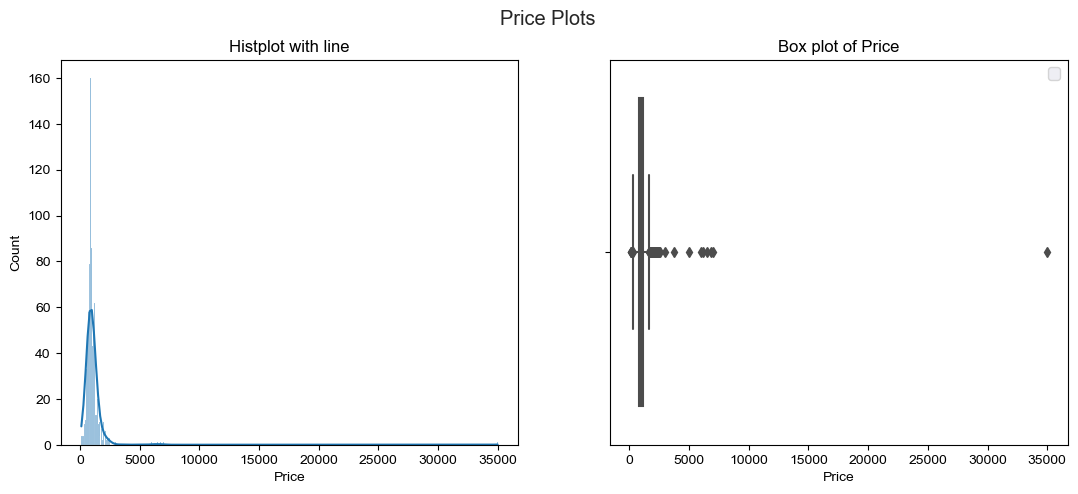

In [34]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(13,5))
sns.set_theme()
fig.suptitle('Price Plots')
sns.histplot(ax=axes[0], data=df, x=df['Price'], kde=True)
axes[0].set_title('Histplot with line')
sns.boxplot(ax=axes[1], data=df, x=df['Price'])
axes[1].set_title('Box plot of Price')
plt.legend()
plt.show()

As we can see from the graph, the data distribution is not normal and the outliers can be clearly seen from the data distribution.
In order to have a "bell curve", we remove the clear outliers.

The descriptive statistics also indicate abnormality, the standard deviation is 1000, which is abnormal for an iPhone price.
Based on the Apple Store, Normal new IPhone prices are around 1000-1200 for the iPhone 14 Max Pro

In [35]:
# remove if title contains "case"
df = df[~df['Title'].str.contains(r'\b(case)\b', case=False, regex=True)]

# remove if df contains for parts
df = df[~df['Title'].str.contains(r'\b(parts)\b', case=False, regex=True)]

# remove if df contains repair
df = df[~df['Title'].str.contains(r'\b(repair)\b', case=False, regex=True)]

C:\Users\azhar\AppData\Local\Temp\ipykernel_2764\2759614669.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df = df[~df['Title'].str.contains(r'\b(case)\b', case=False, regex=True)]
C:\Users\azhar\AppData\Local\Temp\ipykernel_2764\2759614669.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df = df[~df['Title'].str.contains(r'\b(parts)\b', case=False, regex=True)]
C:\Users\azhar\AppData\Local\Temp\ipykernel_2764\2759614669.py:8: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df = df[~df['Title'].str.contains(r'\b(repair)\b', case=False, regex=True)]


In [36]:
df_overpriced = df[df['Price'] > 2000]

In [37]:
df_overpriced

Title  \
51            apple iphone 15 pro max 1tb falcon 150grams 18k gold with diamonds video   
221                                        apple iphone 15 pro max 512gb chaos edition   
281   apple iphone 14 pro max 512gb sealed deep purple unlocked fast next day delivery   
292          apple iphone 14 pro max 256gb deeppurple 5gunlockeddualsimfreenewsealeduk   
320                           apple iphone 15 pro 512gb platinum vision edition carbon   
336       brand new apple iphone 14 pro max 1 tb silver gsm cdma factory unlocked esim   
361            apple iphone 14 pro max apple ios smartphone in black with 1 tb storage   
366                                      apple iphone 15 pro max 512gb bentley edition   
370                                           apple iphone 15 pro max 512gb dg edition   
386                    apple iphone 15 pro 512gb sr edition with lab diamonds 24k gold   
409                                    apple iphone 14 pro max 1 tb 67 120hz 5g silver   
421                                     apple iphone 14 pro max 1 tb 67 120hz 5g white   
427        apple iphone 14 pro max 256gb deeppurple  5gunlockeddualsimfreenew n sealed   
429                                     apple iphone 14 pro max 1 tb 67 120hz 5g black   
432            apple iphone 14 pro max sealed new unlocked space black 128gb  was 2279   
433              apple iphone 14 pro max 1tb silver factory unlocked 2 x physical sims   
443                                     apple iphone 14 pro max 128gb 67 120hz 5g gold   
612     apple iphone 14 pro max 1tb sealed deep purple unlocked fast next day delivery   
652   apple iphone 14 pro max 512gb sealed deep purple unlocked fast next day delivery   
673     apple iphone 14 pro max 1tb sealed deep purple unlocked fast next day delivery   
715                                  new apple iphone 15 pro max 512gb  blue  unlocked   
739            new apple iphone 15 pro max 512gb  blue unlocked free same day shipping   
743                                 iphone 14 pro max 128gb with original blue twitter   
748        apple iphone 14 pro max  512gb  gold unlockedcustomize lether and 24 k gold   
854                                                   apple iphone 14 pro max 1tb gold   
875                                                 apple iphone 14 pro max 1tb silver   
923                                                   apple iphone 14 pro max 1tb gold   
962                                                   apple iphone 14 pro max 1tb gold   
1005                    brand new sealed apple iphone 14 pro max  1tb  silver unlocked   
1007                                           apple iphone 14 pro max 1tb deep purple   

         Price  Storage Capacity        Color Condition  color_number  \
51    35000.00              1024         Gold   Unknown             1   
221    7000.00               512         None   Unknown             0   
281    2365.49               512  Deep purple   Unknown             3   
292    2488.78               256       Purple       New             3   
320    6000.00               512         None   Unknown             0   
336    2299.00              1024       Silver       New             2   
361    2525.11              1024        Black   Unknown             4   
366    6500.00               512         None   Unknown             0   
370    6800.00               512         None   Unknown             0   
386    6200.00               512         Gold   Unknown             1   
409    2999.99              1024       Silver   Unknown             2   
421    2379.99              1024         None   Unknown             0   
427    2239.65               256       Purple       New             3   
429    2499.99              1024        Black   Unknown             4   
432    2340.58               128  Space black       New             4   
433    2147.00              1024       Silver   Unknown             2   
443    2099.99               128         Gold   U

In [38]:
# Remove iPhone prices under 200 and over 2000$

df = df.drop(df.loc[(df['Price'] < 200) | (df['Price'] > 2000)].index)

In [39]:
df.shape

(871, 9)

In [40]:
df.columns

Index(['Title', 'Price', 'Storage Capacity', 'Color', 'Condition',
       'color_number', 'Condition_number', 'Network Carrier',
       'Carrier Category'],
      dtype='object')

In [41]:
df

Title  \
0               apple iphone 14 pro max 512gb unlocked att tmobile verizon very good condition   
3                                  apple iphone 14 pro max 256gb  unlocked us e sim  excellent   
4                              apple iphone 14 pro max  128gb  deep purple unlocked smartphone   
5                                     new listingapple iphone 14 pro max  128gb black unlocked   
6                                  apple iphone 14 pro max 256gb  unlocked us e sim  very good   
8                            apple iphone 14 pro max 256gb space black unlocked fair condition   
10            new listingapple iphone 14 pro max  256gb  space black carrier locked  check esn   
11                             tmobile apple iphone 14 pro max 256gb mq8w3lla a2651 no reserve   
12                                     new listingapple iphone 14 pro max  128gb  gold tmobile   
13                           apple iphone 14 pro max 128gb space black unlocked fair condition   
14                         apple iphone 14 pro max  128gb  space black verizon check esn  read   
15                     apple iphone 14 pro max 128gb  space blackus cellular look at lens read   
17                         apple iphone 14 pro max  256gb  space black verizon check esn  read   
18                    new listingapple iphone 14 pro max  128gb  white verizon check esn  read   
20                                             apple iphone 14 pro max  512gb  silver unlocked   
21                  damaged apple iphone 14 pro max 128gb black unlocked  spares  repairs f481   
23                           new listingapple iphone 14 pro max 128gb deep purple att financed   
24                                             apple iphone 14 pro max  128gb  space black att   
26                          apple iphone 14 pro max  128gb  gold verizon a excellent condition   
28                             new listingapple iphone 14 pro max  128gb  space black unlocked   
31                                         apple iphone 14 pro max  128gb  deep purple tmobile   
32                                       new listingapple iphone 14 pro max a2651 256gb purple   
33                     apple iphone 14 pro max  512gb  gold  unlocked  please read description   
35          new listingbrand new apple iphone 14 pro max space black 1tb applecare replacement   
36                                      new apple iphone 14 pro max  1tb  space black unlocked   
37              apple iphone 14 pro max 256gb unlocked att tmobile verizon very good condition   
39                    apple iphone 14 pro max deep purple 5g smartphone 128gb vodafone network   
40           new listingapple iphone 14 pro max 512gb deep purple unlocked excellent condition   
41                 damaged apple iphone 14 pro max 128gb silver unlocked  spares  repairs f497   
43                 new listingapple iphone 14 pro max  256gb  gold att bad esn read no returns   
44                               iphone 14 pro max  factory unlocked  512gb  purple  excellent   
45                                             apple iphone 14 pro max  256gb  deep purple att   
47                               apple iphone 14 pro max 256gb silver unlocked  fair condition   
48             new listingapple iphone 14 pro max 256gb deep purple tmobile financed excellent   
49                           new verizon apple iphone 14 pro max 128gb mq8q3lla a2651 gold bad   
50                           apple iphone 14 pro  128gb  silver unlocked some light scratching   
52                           apple iphone 14 pro max 512gb deep purple unlocked fair condition   
53                      new listingapple iphone 14 pro max  256gb  gold  verizon  unclean imei   
54                            apple iphone 14 pro max 1tb bundle  space black factory unlocked   
55                                             apple iphone 14 pro max  128gb  silver spectrum   
59                            apple iphone 13 pro max  128gb  space bla

C:\Users\azhar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


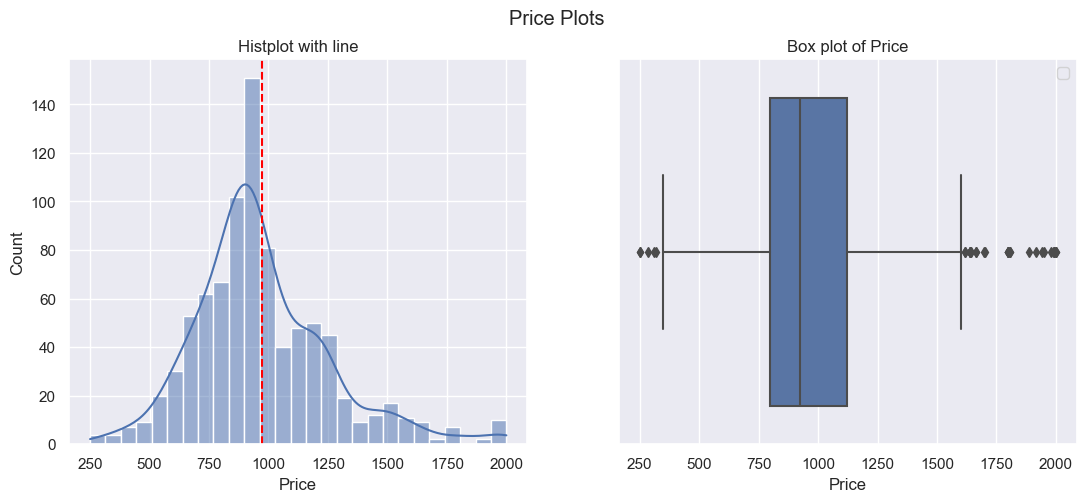

In [42]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(13,5))
sns.set_theme()
fig.suptitle('Price Plots')
sns.histplot(ax=axes[0], data=df, x=df['Price'], kde=True)
axes[0].axvline(df['Price'].mean(), color='red', linestyle='--', label='Mean')
axes[0].set_title('Histplot with line')
sns.boxplot(ax=axes[1], data=df, x=df['Price'])
axes[1].set_title('Box plot of Price')
plt.legend()
plt.show()

In [43]:
df.describe()

Price  Storage Capacity  color_number  Condition_number  \
count   871.000000        871.000000    871.000000        871.000000   
mean    971.438427        328.303100      2.574053          1.006889   
std     286.036940        283.376132      1.342914          1.378805   
min     250.000000        128.000000      0.000000          0.000000   
25%     800.000000        128.000000      1.000000          0.000000   
50%     925.000000        256.000000      3.000000          0.000000   
75%    1121.070000        512.000000      4.000000          3.000000   
max    2000.000000       1024.000000      4.000000          3.000000   

       Carrier Category  
count        871.000000  
mean           0.644087  
std            0.756327  
min            0.000000  
25%            0.000000  
50%            0.000000  
75%            1.000000  
max            2.000000

In [44]:
## Remove price outliers
## TODO: Improve outlier algorithm
# remove if Z-Score more than 3 for upper-bound, and -1.5 for lower bound

# add zscore column
df['zscore'] = (df.Price - df.Price.mean())/df.Price.std()



In [45]:
# drop columns with zscore > 3 and < -2.5
df = df.drop(df.loc[(df.zscore > 2.5) | (df.zscore < -2)].index)

C:\Users\azhar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


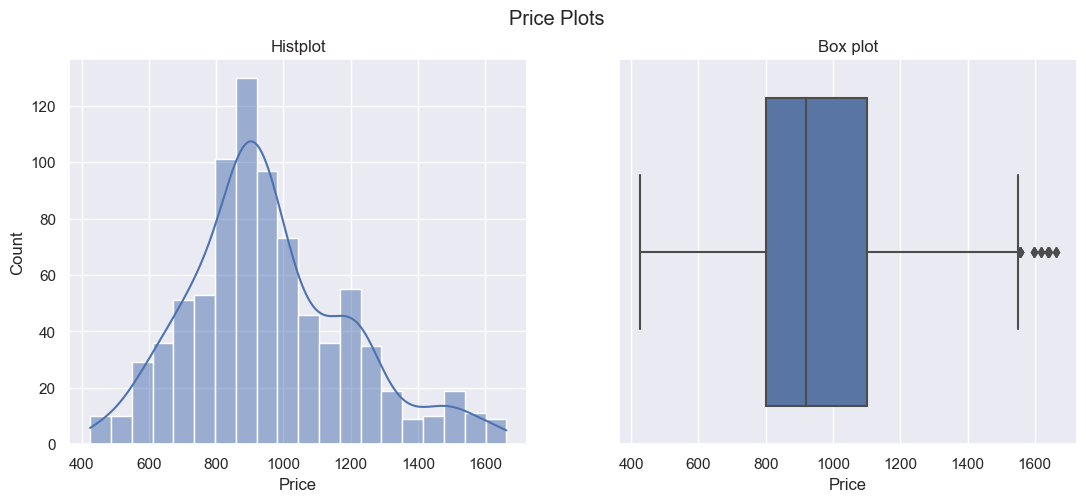

In [46]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(13,5))
sns.set_theme()
fig.suptitle('Price Plots')
sns.histplot(ax=axes[0], data=df, x=df['Price'], kde=True)
axes[0].set_title('Histplot')
sns.boxplot(ax=axes[1], data=df, x=df['Price'])
axes[1].set_title('Box plot')


plt.show()

In [47]:
df.tail()

Title    Price  \
1018  apple iphone 14 pro max  256gb  space black unlocked a2651 gsm   940.00   
1019                    apple iphone 14 pro max  128gb  gold verizon   950.00   
1020                         iphone 14 pro max 128gb silver unlocked  1008.98   
1021               apple iphone 14 pro max  1tb  deep purple tmobile  1300.00   
1022            apple iphone 14 pro max  128gb  deep purple unlocked   980.00   

      Storage Capacity        Color Condition  color_number  Condition_number  \
1018               256  Space black   Unknown             4                 0   
1019               128         Gold   Unknown             1                 0   
1020               128       Silver   Unknown             2                 0   
1021              1024  Deep purple   Unknown             3                 0   
1022               128  Deep purple   Unknown             3                 0   

     Network Carrier  Carrier Category    zscore  
1018        unlocked                 0 -0.109910  
1019         verizon                 1 -0.074950  
1020        unlocked                 0  0.131247  
1021         tmobile                 1  1.148668  
1022        unlocked                 0  0.029932

In [48]:
df = df.reset_index().drop(columns=['index', 'zscore'])

In [49]:
df.shape

(839, 9)

In [50]:
df.describe()

Price  Storage Capacity  color_number  Condition_number  \
count   839.000000        839.000000    839.000000        839.000000   
mean    956.867032        324.195471      2.587604          1.015495   
std     240.933825        279.051821      1.337593          1.383848   
min     425.000000        128.000000      0.000000          0.000000   
25%     800.000000        128.000000      1.000000          0.000000   
50%     919.990000        256.000000      3.000000          0.000000   
75%    1100.000000        512.000000      4.000000          3.000000   
max    1662.940000       1024.000000      4.000000          3.000000   

       Carrier Category  
count        839.000000  
mean           0.644815  
std            0.753793  
min            0.000000  
25%            0.000000  
50%            0.000000  
75%            1.000000  
max            2.000000

In [51]:
# Ready DF FINALLY!!!!
df

Title  \
0              apple iphone 14 pro max 512gb unlocked att tmobile verizon very good condition   
1                                 apple iphone 14 pro max 256gb  unlocked us e sim  excellent   
2                             apple iphone 14 pro max  128gb  deep purple unlocked smartphone   
3                                    new listingapple iphone 14 pro max  128gb black unlocked   
4                                 apple iphone 14 pro max 256gb  unlocked us e sim  very good   
5                           apple iphone 14 pro max 256gb space black unlocked fair condition   
6            new listingapple iphone 14 pro max  256gb  space black carrier locked  check esn   
7                                     new listingapple iphone 14 pro max  128gb  gold tmobile   
8                           apple iphone 14 pro max 128gb space black unlocked fair condition   
9                         apple iphone 14 pro max  128gb  space black verizon check esn  read   
10                    apple iphone 14 pro max 128gb  space blackus cellular look at lens read   
11                        apple iphone 14 pro max  256gb  space black verizon check esn  read   
12                   new listingapple iphone 14 pro max  128gb  white verizon check esn  read   
13                                            apple iphone 14 pro max  512gb  silver unlocked   
14                 damaged apple iphone 14 pro max 128gb black unlocked  spares  repairs f481   
15                          new listingapple iphone 14 pro max 128gb deep purple att financed   
16                         apple iphone 14 pro max  128gb  gold verizon a excellent condition   
17                            new listingapple iphone 14 pro max  128gb  space black unlocked   
18                                        apple iphone 14 pro max  128gb  deep purple tmobile   
19                                      new listingapple iphone 14 pro max a2651 256gb purple   
20                    apple iphone 14 pro max  512gb  gold  unlocked  please read description   
21         new listingbrand new apple iphone 14 pro max space black 1tb applecare replacement   
22             apple iphone 14 pro max 256gb unlocked att tmobile verizon very good condition   
23                   apple iphone 14 pro max deep purple 5g smartphone 128gb vodafone network   
24          new listingapple iphone 14 pro max 512gb deep purple unlocked excellent condition   
25                new listingapple iphone 14 pro max  256gb  gold att bad esn read no returns   
26                              iphone 14 pro max  factory unlocked  512gb  purple  excellent   
27                                            apple iphone 14 pro max  256gb  deep purple att   
28                              apple iphone 14 pro max 256gb silver unlocked  fair condition   
29            new listingapple iphone 14 pro max 256gb deep purple tmobile financed excellent   
30                          new verizon apple iphone 14 pro max 128gb mq8q3lla a2651 gold bad   
31                          apple iphone 14 pro  128gb  silver unlocked some light scratching   
32                          apple iphone 14 pro max 512gb deep purple unlocked fair condition   
33                     new listingapple iphone 14 pro max  256gb  gold  verizon  unclean imei   
34                           apple iphone 14 pro max 1tb bundle  space black factory unlocked   
35                                            apple iphone 14 pro max  128gb  silver spectrum   
36                        apple iphone 14 pro max 128gb deep purple  unlocked  good condition   
37                                       apple iphone 14 pro max  256gb  deep purple unlocked   
38                          apple iphone 14 pro max 512gb  unlocked us esim version excellent   
39                  apple iphone 14 pro max 512gb unlocked att tmobile verizon fair condition   
40                      apple iphone 14 pro max  128gb  silver unlocked cracked back and bend   
41            

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839 entries, 0 to 838
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             839 non-null    object 
 1   Price             839 non-null    float64
 2   Storage Capacity  839 non-null    int64  
 3   Color             752 non-null    object 
 4   Condition         839 non-null    object 
 5   color_number      839 non-null    int64  
 6   Condition_number  839 non-null    int64  
 7   Network Carrier   839 non-null    object 
 8   Carrier Category  839 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 59.1+ KB


# 4    Exploratory Data Analysis

In [53]:
df.to_csv('eda_ready.csv')

In [54]:
# for exploratory data analysis, we change the column value to string.
df_eda = df.copy()

In [55]:
df_eda.describe()

Price  Storage Capacity  color_number  Condition_number  \
count   839.000000        839.000000    839.000000        839.000000   
mean    956.867032        324.195471      2.587604          1.015495   
std     240.933825        279.051821      1.337593          1.383848   
min     425.000000        128.000000      0.000000          0.000000   
25%     800.000000        128.000000      1.000000          0.000000   
50%     919.990000        256.000000      3.000000          0.000000   
75%    1100.000000        512.000000      4.000000          3.000000   
max    1662.940000       1024.000000      4.000000          3.000000   

       Carrier Category  
count        839.000000  
mean           0.644815  
std            0.753793  
min            0.000000  
25%            0.000000  
50%            0.000000  
75%            1.000000  
max            2.000000

In [56]:
# correlation matrix of numerical / categorical data
correlation_matrix = df_eda[['Price', 'Storage Capacity', 'color_number', 'Condition_number', 'Carrier Category']].corr()

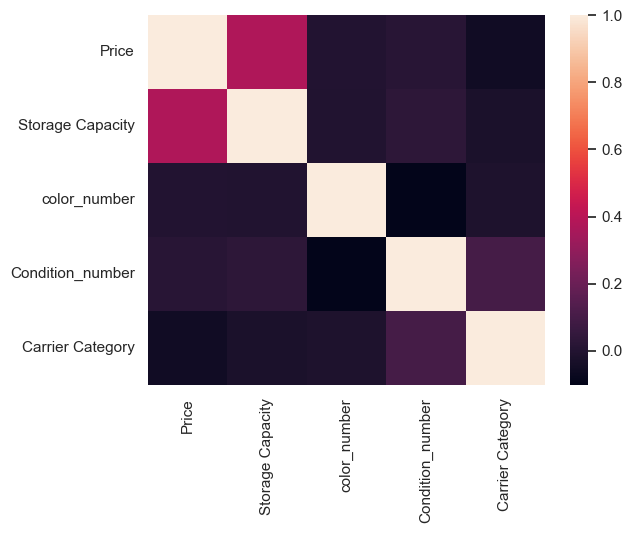

In [65]:
sns.heatmap(correlation_matrix)
plt.show()

In [58]:
data_storage_price = df_eda.groupby('Storage Capacity')['Price'].mean().reset_index()

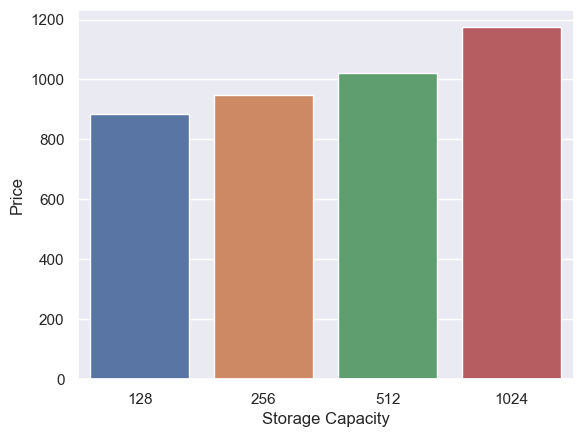

In [86]:
sns.barplot(x=data_storage_price['Storage Capacity'], y=data_storage_price['Price'])
plt.show()

In [76]:
df_eda.head()

Title  \
0  apple iphone 14 pro max 512gb unlocked att tmobile verizon very good condition   
1                     apple iphone 14 pro max 256gb  unlocked us e sim  excellent   
2                 apple iphone 14 pro max  128gb  deep purple unlocked smartphone   
3                        new listingapple iphone 14 pro max  128gb black unlocked   
4                     apple iphone 14 pro max 256gb  unlocked us e sim  very good   

    Price  Storage Capacity        Color  Condition  color_number  \
0  884.95               512         None  Very good             0   
1  909.99               256         None  Excellent             0   
2  810.00               128  Deep purple    Unknown             3   
3  710.00               128        Black        New             4   
4  889.99               256         None  Very good             0   

   Condition_number Network Carrier  Carrier Category  
0                 3        unlocked                 0  
1                 3        unlocked                 0  
2                 0        unlocked                 0  
3                 3        unlocked                 0  
4                 3        unlocked                 0

In [91]:
df_eda.head()

Title  \
0  apple iphone 14 pro max 512gb unlocked att tmobile verizon very good condition   
1                     apple iphone 14 pro max 256gb  unlocked us e sim  excellent   
2                 apple iphone 14 pro max  128gb  deep purple unlocked smartphone   
3                        new listingapple iphone 14 pro max  128gb black unlocked   
4                     apple iphone 14 pro max 256gb  unlocked us e sim  very good   

    Price  Storage Capacity        Color  Condition  color_number  \
0  884.95               512         None  Very good             0   
1  909.99               256         None  Excellent             0   
2  810.00               128  Deep purple    Unknown             3   
3  710.00               128        Black        New             4   
4  889.99               256         None  Very good             0   

   Condition_number Network Carrier  Carrier Category  
0                 3        unlocked                 0  
1                 3        unlocked                 0  
2                 0        unlocked                 0  
3                 3        unlocked                 0  
4                 3        unlocked                 0

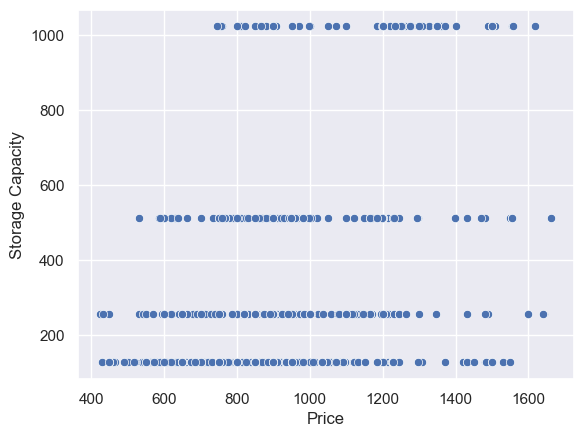

In [96]:
sns.scatterplot(data=df_eda, x='Price', y='Storage Capacity')
plt.show()

In [101]:
df_eda.head()

Title  \
0  apple iphone 14 pro max 512gb unlocked att tmobile verizon very good condition   
1                     apple iphone 14 pro max 256gb  unlocked us e sim  excellent   
2                 apple iphone 14 pro max  128gb  deep purple unlocked smartphone   
3                        new listingapple iphone 14 pro max  128gb black unlocked   
4                     apple iphone 14 pro max 256gb  unlocked us e sim  very good   

    Price  Storage Capacity        Color  Condition  color_number  \
0  884.95               512         None  Very good             0   
1  909.99               256         None  Excellent             0   
2  810.00               128  Deep purple    Unknown             3   
3  710.00               128        Black        New             4   
4  889.99               256         None  Very good             0   

   Condition_number Network Carrier  Carrier Category  
0                 3        unlocked                 0  
1                 3        unlocked                 0  
2                 0        unlocked                 0  
3                 3        unlocked                 0  
4                 3        unlocked                 0

C:\Users\azhar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



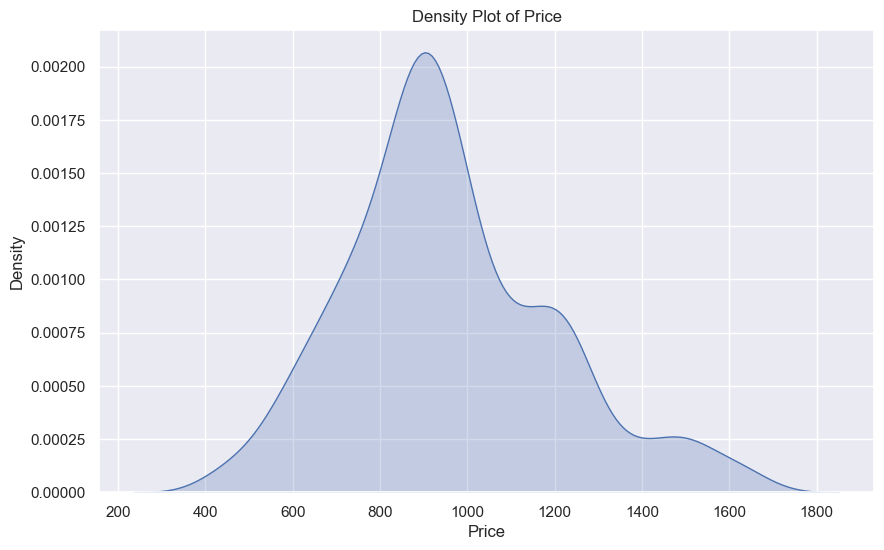

In [102]:
# Choose the column you want to plot, for example, 'Price'
column_to_plot = 'Price'

# Create the density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(df[column_to_plot], fill=True)
plt.title(f'Density Plot of {column_to_plot}')
plt.xlabel(column_to_plot)
plt.ylabel('Density')
plt.show()

## Machine Learning Model to Predict the Price

In [142]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

In [110]:
df_ML = df.copy()

In [111]:
df_ML.head()

Title  \
0  apple iphone 14 pro max 512gb unlocked att tmobile verizon very good condition   
1                     apple iphone 14 pro max 256gb  unlocked us e sim  excellent   
2                 apple iphone 14 pro max  128gb  deep purple unlocked smartphone   
3                        new listingapple iphone 14 pro max  128gb black unlocked   
4                     apple iphone 14 pro max 256gb  unlocked us e sim  very good   

    Price  Storage Capacity        Color  Condition  color_number  \
0  884.95               512         None  Very good             0   
1  909.99               256         None  Excellent             0   
2  810.00               128  Deep purple    Unknown             3   
3  710.00               128        Black        New             4   
4  889.99               256         None  Very good             0   

   Condition_number Network Carrier  Carrier Category  
0                 3        unlocked                 0  
1                 3        unlocked                 0  
2                 0        unlocked                 0  
3                 3        unlocked                 0  
4                 3        unlocked                 0

In [112]:
df_ML = df_ML[['Title', 'Price', 'Storage Capacity', 'color_number', 'Condition_number', 'Carrier Category']]

In [118]:
features = ['Storage Capacity', 'color_number', 'Condition_number', 'Carrier Category']

In [122]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['Carrier Category', 'Storage Capacity', 'color_number', 'Condition_number'])
    ])

In [124]:
X = df[features]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [127]:
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

In [128]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['Carrier Category',
                                                   'Storage Capacity',
                                                   'color_number',
                                                   'Condition_number'])])),
                ('regressor', LinearRegression())])

In [129]:
y_pred = model.predict(X_test)

In [133]:
df_result = pd.DataFrame(columns=['y_test', 'y_pred'])

In [134]:
df_result['y_test'], df_result['y_pred'] = y_test, y_pred

In [137]:
df_result['MSE'] = (df_result['y_test'] - df_result['y_pred'])**2

In [138]:
df_result

y_test       y_pred            MSE
211  1662.94  1037.569550  391088.199129
825  1146.00   991.762091   23789.332582
78    790.00   959.474464   28721.593817
67    639.99   782.680278   20360.515527
792  1228.97   988.606390   57774.665228
731   850.00   850.243115       0.059105
30    724.99   848.884133   15349.756226
292   819.99   922.402535   10488.327270
247   788.99   901.833995   12733.767202
723  1100.00  1059.613606    1631.060825
425  1194.64  1072.844760   14834.080547
368  1250.00  1180.873128    4778.524487
464   934.24   988.606390    2955.704313
65    699.99   850.243115   22575.998552
606  1050.00  1201.132582   22841.057331
377   728.00   969.243448   58198.400997
239  1121.09  1095.037875     678.713234
549  1000.00  1043.352971    1879.480094
814  1033.89  1023.881599     100.168094
327   793.62   967.446728   30215.731355
208   864.95   999.342231   18061.271779
599  1096.16   907.926501   35431.850186
155  1597.97  1057.965946  291604.378564
622   871.96   924.199254    2728.939694
215   950.00   967.446728     304.388317
291  1480.99   988.606390  242441.619838
750  1089.94   929.982675   25586.345867
793   820.00   857.823255    1430.598624
487  1058.59  1034.617440     574.683615
532  1010.00   935.159101    5601.160222
39    809.95   992.461849   33310.574992
213  1239.42   899.883891  115284.769087
685  1494.77   924.199254  325550.975801
766   800.00   756.568196    1886.321624
412  1225.00   929.982675   87035.222134
231   836.99   737.110291    9975.956361
610  1244.40  1028.834020   46468.691798
362  1152.23   929.982675   49393.873533
342   700.00   909.723221   43983.829218
727   950.00   756.568196   37415.862913
66    800.00   929.982675   16895.495763
96    649.99   737.572577    7670.707750
137   747.50   780.883559    1114.461992
23    460.89   780.883559  102395.877617
442   810.00   916.446970   11330.957373
218   750.00   780.883559     953.794199
795  1431.25   924.199254  257100.458672
526  1121.09  1093.241155     775.558165
63    649.95   850.243115   40117.331896
139   969.99  1202.929302   54260.718218
831  1500.00  1053.830185  199067.503435
835   950.00   847.087414   10591.000454
254   849.99   847.087414       8.425008
677   923.95   977.286057    2844.734990
250   949.99   999.342231    2435.642714
548  1000.00  1169.237079   28641.188852
483   948.28   944.998430      10.768703
86    590.00   460.027903   16892.745877
673   815.00   929.982675   13221.015517
588   980.00  1023.093517    1857.051177
311   899.00  1023.881599   15595.413724
346   590.00   901.833995   97240.440424
621   999.00  1035.772831    1352.241091
697  1483.51   957.677744  276499.561447
568   649.00   837.563801   35556.306941
749  1100.00   916.446970   33691.714908
447  1029.43   967.054604    3890.690059
266   849.99   852.039835       4.201822
629   895.00   991.762091    9362.902249
361   984.05   993.558811      90.417479
728   950.00   922.402535     761.620089
635   800.00   850.243115    2524.370600
49    747.39  1230.624371  233515.457044
567   940.47   929.982675     109.983989
756  1638.99  1034.617440  365266.190840
174   899.99   859.619975    1629.738944
120   529.99   573.398200    1884.271793
579   900.00   929.982675     898.960792
834   940.00   999.342231    3521.500391
33    749.99   918.243689   28309.303989
31    730.00   898.087172   28253.297299
534  1295.70  1259.756297    1291.949810
286  1089.94  1036.414160    2865.015551
344   755.00  1171.033798  173084.121447
422   944.95  1021.296797    5828.833417
360   870.00   988.606390   14067.475642
538  1003.52   957.677744    2101.512435
657  1370.22  1193.552442   31211.426106
72    849.99   788.463699    3785.485735
77    810.00   970.507283   25762.587886
676  1245.64   909.723221  112840.082748
533  1000.00  1137.251895   18838.082671
244   929.99   852.039835    6076.228292
493   950.00   850.243115    9951.436115
737   850.00   780.883559    4777.082456
294   899.00   780.883559   13951.493703
109   449.99   644.402229   3

In [140]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 50077.53630590021


In [143]:
# Perform K-fold cross validation

k = 5  # number of folds
scores = cross_val_score(model, X, y, cv=k, scoring='neg_mean_squared_error')

# Output the average of the k-fold cross-validation scores
print(f"Average Mean Squared Error across {k} folds: {-scores.mean()}")

Average Mean Squared Error across 5 folds: 50123.99575398829


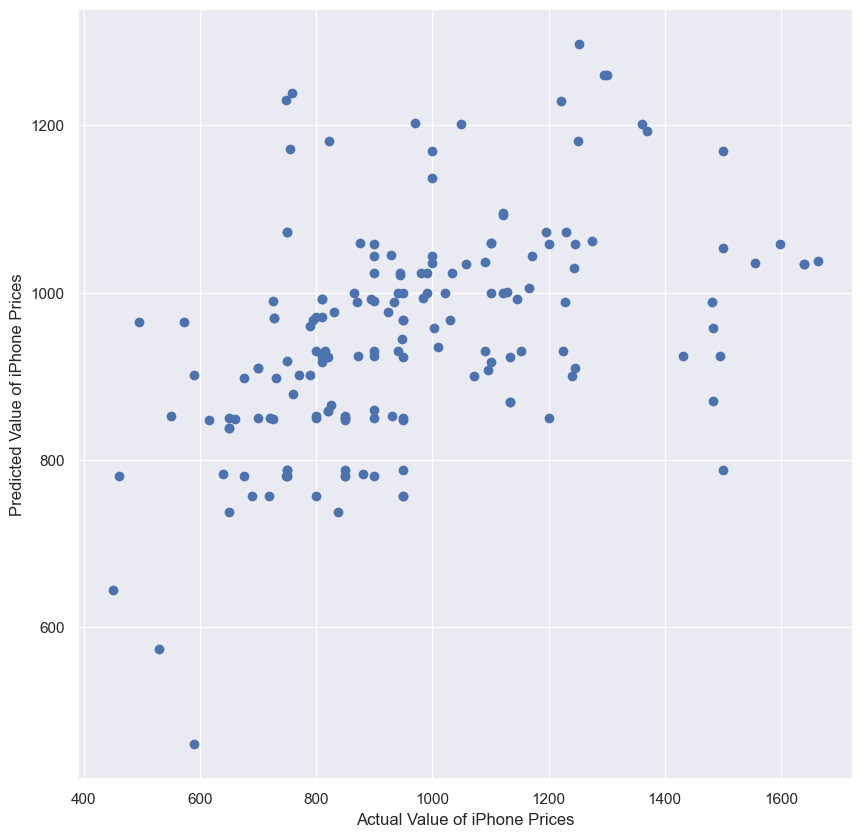

In [148]:
# plot the actual value as x axis, predicted value on y-axis
plt.figure(figsize=(10,10))
plt.scatter(df_result['y_test'], df_result['y_pred'])
plt.xlabel('Actual Value of iPhone Prices')
plt.ylabel('Predicted Value of iPhone Prices')
plt.show()

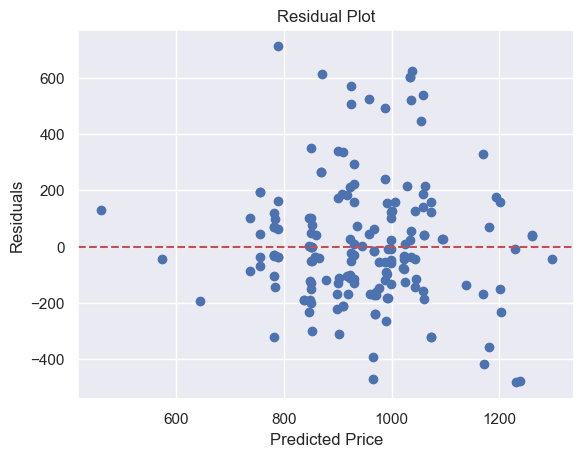

In [149]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()